<a href="https://colab.research.google.com/github/carlamoema/Imersao_dados_Alura/blob/main/Imersao_dados_4_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando as Bibliotecas que serão utilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Carregando o Dataset

In [ ]:
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

Reproduzindo códigos executados na Aula 02 - Preparando ambiente para realizar Desafios da Aula 02

In [ ]:
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas["Valor_anuncio_float"] = dados_vendas["Valor_anuncio"].str.replace(".","").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Desafios Aula 02

1.   Criar uma escala de valores em milhões




> 1ª Tentativa - Alterando apenas no gráfico



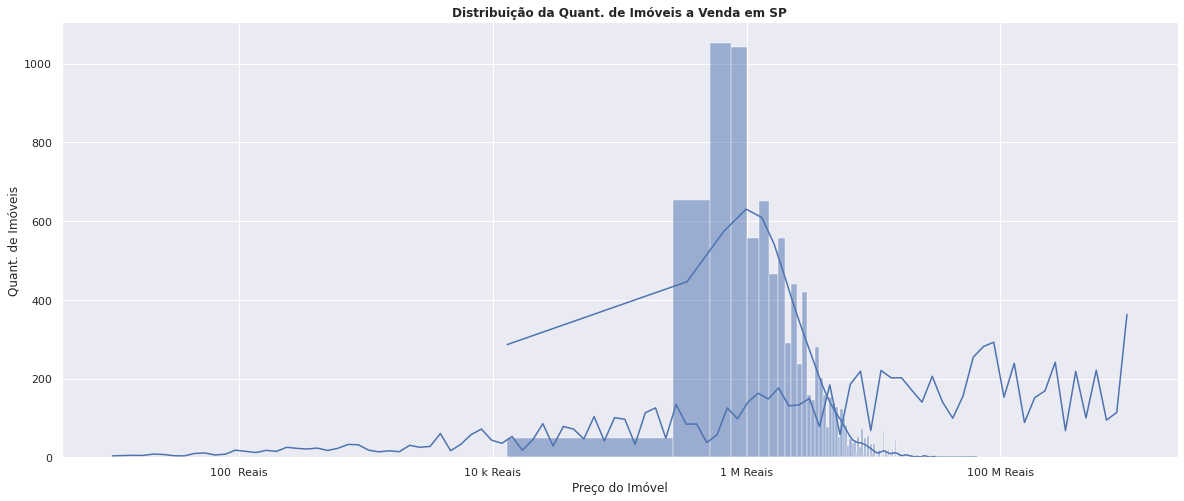

In [ ]:
sns.set()
plt.figure(figsize=(20, 8))
ax = sns.histplot(data = dados_vendas, x= "Valor_anuncio_float", kde = True)
ax.set_title("Distribuição da Quant. de Imóveis a Venda em SP",  fontweight ="bold")
ax.set_xlabel("Preço do Imóvel")
ax.set_ylabel("Quant. de Imóveis")

#Trecho de código extraído e adaptado da url https://acervolima.com/matplotlib-axes-axes-get_xscale-em-python/
import numpy as np 
from matplotlib.ticker import EngFormatter 
val = np.random.RandomState(19680801) 
xs = np.logspace(1, 9, 100)
ys = (0.8 + 4 * val.uniform(size = 100)) * np.log10(xs)**2
ax.set_xscale('log') 
formatter0 = EngFormatter(unit =' Reais') 
ax.xaxis.set_major_formatter(formatter0) 
ax.plot(xs, ys) 
w = ax.get_xscale()
plt.show()
###### Fim do código copiado ############



> 2ª Tentativa - Alterando na base de dados



In [ ]:
# Dividindo a série com os valores dos anúncios por 1 Milhão
# Gravando em uma nova série
dados_vendas["Valor_Milhoes"] = dados_vendas["Valor_anuncio_float"]/(1000000.00)
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_Milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,0.380
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,0.685
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,0.540


In [ ]:
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_Milhoes
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03,9156.000000
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06,3.052203
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06,3.944208
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04,0.013000
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05,0.890000
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06,1.800000
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06,3.500000
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07,65.000000


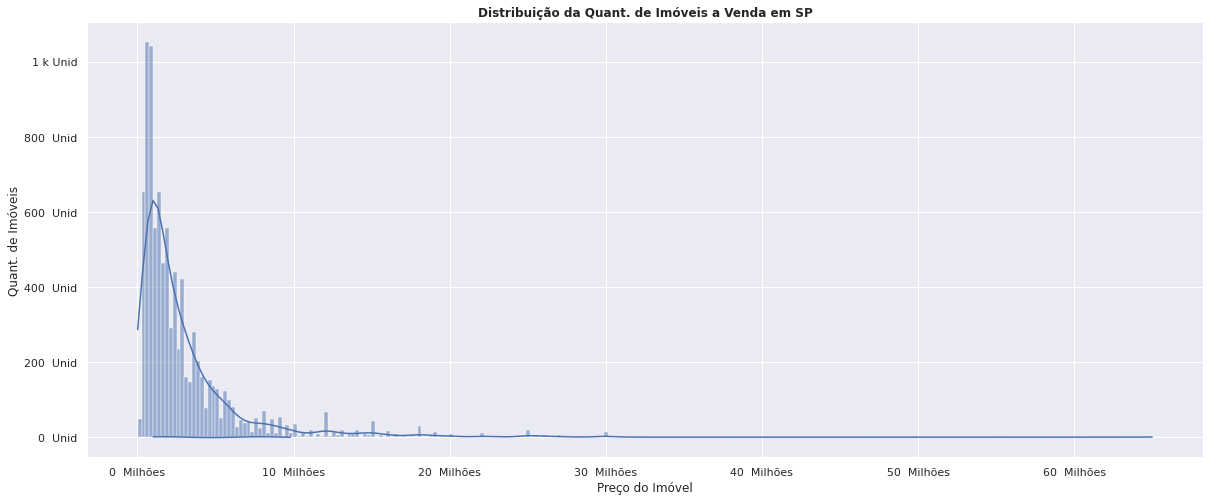

In [ ]:
# Criando o gráfico
plt.figure(figsize=(20, 8))
ax = sns.histplot(data = dados_vendas, x= "Valor_Milhoes", kde = True)
ax.set_title("Distribuição da Quant. de Imóveis a Venda em SP",  fontweight ="bold")
ax.set_xlabel("Preço do Imóvel")
ax.set_ylabel("Quant. de Imóveis")
Unid_x = EngFormatter(unit =' Milhões') 
ax.xaxis.set_major_formatter(Unid_x) 
Unid_y = EngFormatter(unit =' Unid') 
ax.yaxis.set_major_formatter(Unid_y) 
x = np.arange(1,10,0.2)
y = np.sin(x)
ax.plot(x,y)
plt.show()



2.   Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

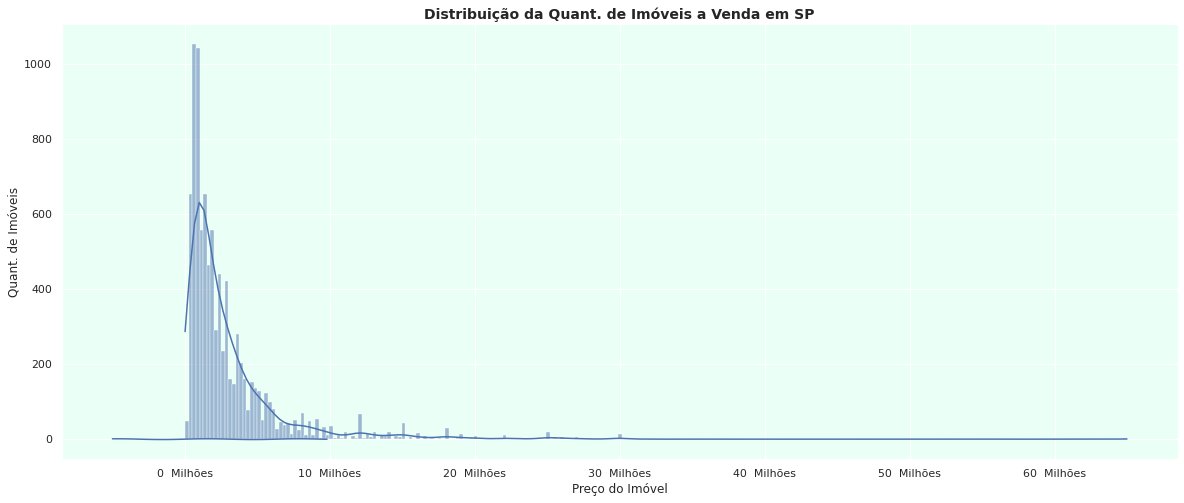

In [ ]:
# Usando a 2a opção, deixando o gráfico mais amigável, intuitivo.

plt.figure(figsize=(20, 8))
ax = sns.histplot(data = dados_vendas, x= "Valor_Milhoes", kde = True)
ax.set_title("Distribuição da Quant. de Imóveis a Venda em SP", fontsize=14, fontweight ="bold")
ax.set_xlabel("Preço do Imóvel")
ax.set_ylabel("Quant. de Imóveis")
Unid_x = EngFormatter(unit =' Milhões') 
ax.xaxis.set_major_formatter(Unid_x) 
ax.set_facecolor('#eafff5')

x = np.arange(-5,10,0.2)
y = np.sin(x)
ax.plot(x,y)


plt.show()

In [ ]:
dados_vendas.head(5)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_Milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,0.380
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,0.685
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,0.540


3. Preço do metro quadrado por bairro e plotar em um gráfico ideal.

In [ ]:
#Criando a série com o valor por m2 ["Valor_M2"]
dados_vendas["Valor_M2"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"].astype(float)

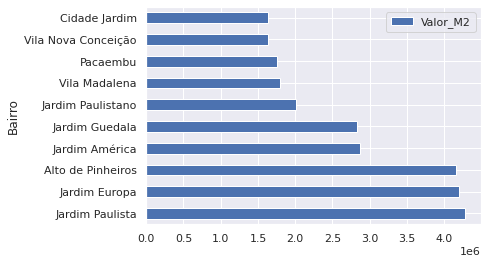

In [ ]:
#Agrupando por bairro, criando um novo dataframe
Bairro_M2 = pd.DataFrame(dados_vendas.groupby("Bairro")["Valor_M2"].sum())

#Criando o gráfico simples com os 10 bairros cujo valor do M2 ficou mais alto
Bairro_M2.sort_values(by = "Valor_M2", ascending= False)[:10].plot(kind='barh')

4. Explorar as bibliotecas de visualizações e colocar as suas conclusão
5. Pesquisar um visualização para analisar os quartis, mediana e outliers